In [442]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import silhouette_score

In [399]:
#Import Excel sheet of CC Customer
CCust_df = pd.read_excel("Downloads/Credit Card Customer Data.xlsx")

In [400]:
CCust_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [401]:
CCust_df.dtypes #Confirming data types

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [402]:
CCust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [403]:
CCust_df.shape

(660, 7)

In [404]:
CCust_df.isnull().sum() #checking for possible null values

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [405]:
CCust_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


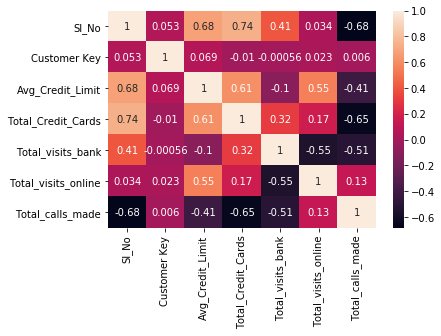

In [406]:
sns.heatmap(CCust_df.corr(),annot=True)

In [407]:
for i in CCust_df:
    print(CCust_df[i].value_counts()) #Value Counts of each column values in the dataframe
    print()

660    1
226    1
224    1
223    1
222    1
      ..
440    1
439    1
438    1
437    1
1      1
Name: Sl_No, Length: 660, dtype: int64

47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer Key, Length: 655, dtype: int64

8000      35
6000      31
9000      28
13000     28
10000     26
          ..
25000      1
153000     1
111000     1
112000     1
106000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64

4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

2    158
1    112
3    100
0    100
5     98
4     92
Name: Total_visits_bank, dtype: int64

2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
12      6
10      6
8       6
13      5
11      5
9       4
14      1
6       1
Name: Total_visits_online, dtype: int64

4     108
0      97
2      91
1      90
3      83
6      39
7    

In [408]:
CCust_df.drop(columns=['Sl_No','Customer Key'],inplace=True) #Dropping insignificant Columns

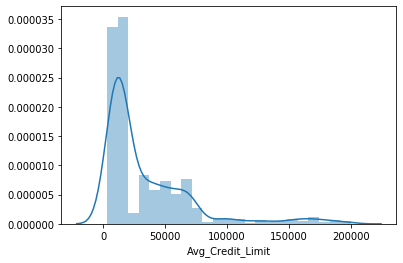

In [409]:
sns.distplot(CCust_df['Avg_Credit_Limit']) #Univariate analysis showing possible 4 clusters

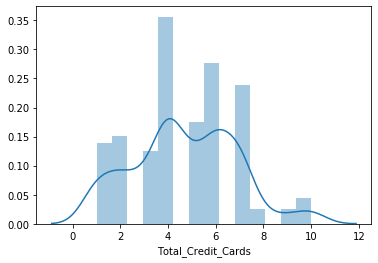

In [410]:
sns.distplot(CCust_df['Total_Credit_Cards']) #Univariate analysis still showing four clusters

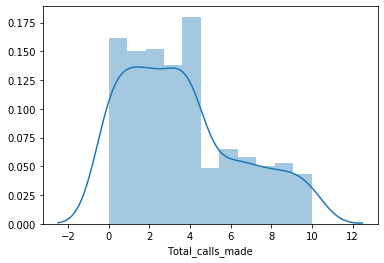

In [411]:
sns.distplot(CCust_df['Total_calls_made'])

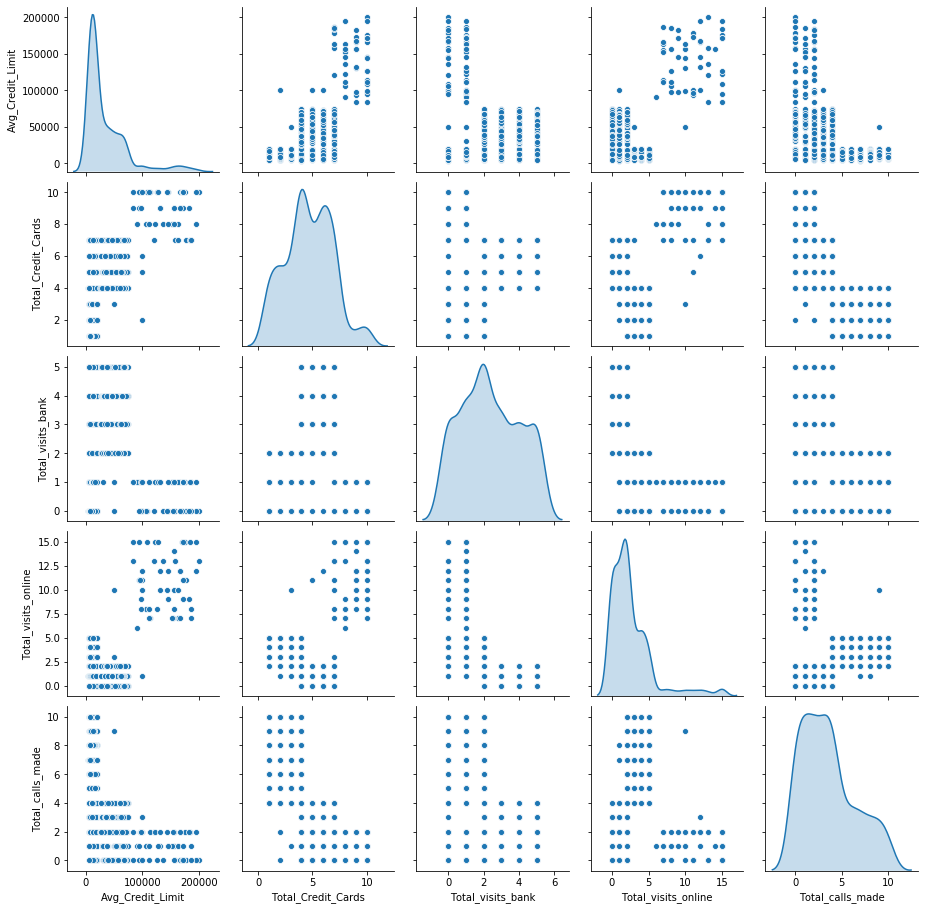

In [412]:
sns.pairplot(CCust_df,diag_kind='kde')

In [413]:
#Observations show the negative correlation between Total visits to Bank and the average credit limit.
#Observations also shows the relationship between Total visits to the bank and Total calls made is negative.
#Total visits to bank and Total visits online also shows a negative relationship.

#Observations show a positive relationship between Total visits to bank and Total credit cards

In [414]:
#There are also negative correlation between:
# Total Calls made and Average Credit Limit
# Total Calls made and Total Credit Cards
#Total Calls made and Visits to the bank
CCust_df.groupby(CCust_df['Total_calls_made']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online
Total_calls_made,,,,
0,54536.082474,5.979381,2.989691,2.587629
1,46877.777778,5.966667,3.122222,2.611111
2,55868.131868,6.087912,2.791209,3.010989
3,35120.481928,5.614458,3.506024,1.277108
4,27787.037037,4.712963,2.685185,1.546296
5,11482.758621,2.413793,0.965517,3.517241
6,11897.435897,2.564103,1.128205,3.564103
7,11571.428571,2.342857,0.914286,3.314286
8,12300.000000,2.366667,0.966667,3.700000


In [415]:
CCust_df.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


In [416]:
#Possibility of feature engineering
#Addition of the two type of visits to form a new feature 'Total Visits' column
#CCust_df['Total Visits'] = CCust_df['Total_visits_bank']+CCust_df['Total_visits_online']
#CCust_df.head()
#CCust_df.drop(columns=['Total Visits'],inplace=True)

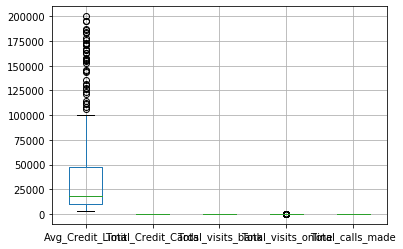

In [417]:
CCust_df.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a3f5c4c90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a3f5aa3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3f5c4c50>],
 'medians': [<matplotlib.lines.Line2D at 0x1a3f5d8dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a3f5cfed0>],
 'means': []}

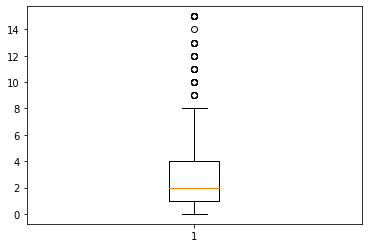

In [418]:
plt.boxplot(CCust_df['Total_visits_online'])

In [419]:
#Using logarithmic transform to reduce outliers
#CCust_df['Total_visits_online'] = np.log(CCust_df['Total_visits_online'])

In [420]:
#plt.boxplot(CCust_df['Total_visits_online'])

In [421]:
from scipy.stats import zscore #Import zscore to standardize data
CCust_df_zscore = CCust_df.apply(zscore) #New Dataframe of zscores values for all columns created

In [422]:
CCust_df_zscore.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


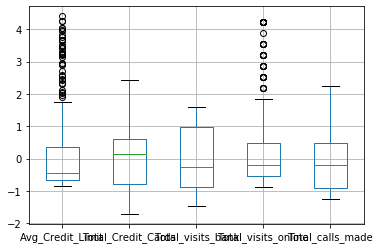

In [423]:
CCust_df_zscore.boxplot()

Text(0.5, 1.0, 'Selecting i with the Elbow Method')

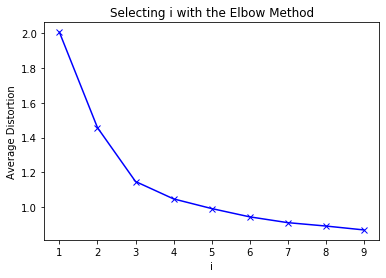

In [424]:
from sklearn.cluster import KMeans #Handle clustering by kmeans
from scipy.spatial.distance import cdist #Import cdist to find distance between each pair of input values
clusters = range(1,10) #Finding the number of optimal clusters
meanDist = []
for i in clusters:
    model = KMeans(n_clusters=i,random_state=5)
    model.fit(CCust_df_zscore)
    prediction = model.predict(CCust_df_zscore)
    meanDist.append(sum(np.min(cdist(CCust_df_zscore,model.cluster_centers_,'euclidean'),axis=1))/CCust_df.shape[0])
    
plt.plot(clusters,meanDist,'bx-')
plt.xlabel('i')
plt.ylabel('Average Distortion')
plt.title('Selecting i with the Elbow Method')


From the above elbow points, we take the subjective approach of looking at 3 clusters and 4 clusters

In [456]:
#Using K = 3 
finalmodel = KMeans(3,random_state=5)
finalmodel.fit(CCust_df_zscore)
#prediction = finalmodel.predict(CCust_df_zscore)

#Append predictions to CCust and Scaled CCust df
CCust_df["Group"] = finalmodel.labels_
CCust_df_zscore["Group"] = finalmodel.labels_
print("Groups Assigned: \n")
CCust_df_zscore.head()

labels = finalmodel.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

Groups Assigned: 

[223 247 190]


In [426]:
#Analyzing the data distribution according to the groups
CCust_df_clust = CCust_df.groupby(['Group'])
CCust_df_clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,33782.383420,5.515544,3.489637,0.981865,2.000000
2,141040.000000,8.740000,0.600000,10.900000,1.080000


#Customers with low Average Credit Limit have small number of credit cards and the higest calls made
#Customers with Medium Average Credit Limit are notable for having the highest number of visits to the bank
#Customers with High Average Credit Limit has more credit cards and the higest number of visits online

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3f7875d0>,
      dtype=object)

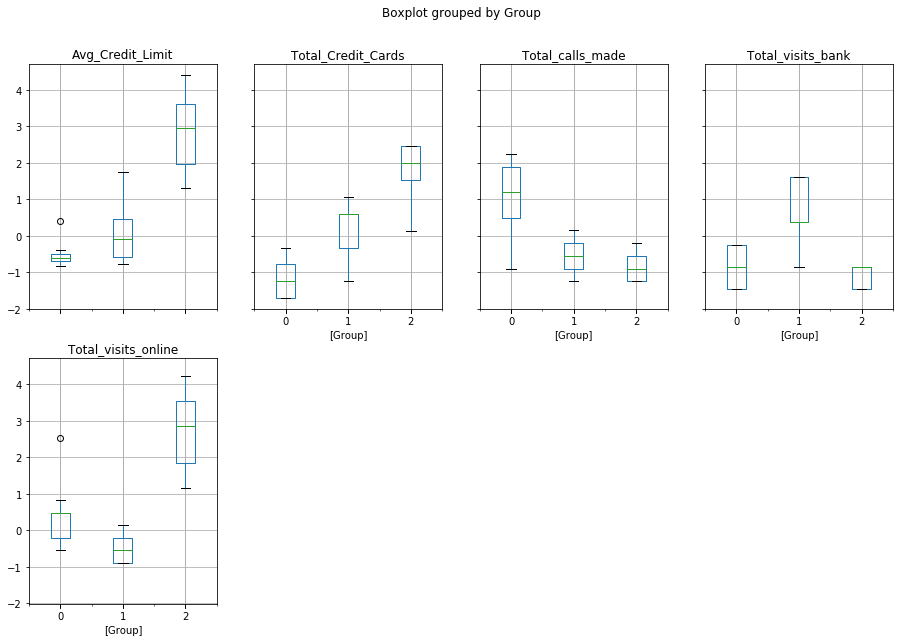

In [427]:
#Visualizing each group using box plot
CCust_df_zscore.boxplot(by='Group',layout=(2,4),figsize=(15,10))

#Average Credit Limist: Group 2 has the largest range of customers.
#Total Credit Card is near evenly distributed amongst the 3 groups.
#Total calls made are higher for customers in the first group (group 0)
#Total visits to the bank is very low for customers in the second group (group 1) compared to others
#Total visits online is highly popular with customers belonging to the second group (group 1)

In [455]:
#Using K = 4 elbow point
finalmodel = KMeans(4,random_state=5)
finalmodel.fit(CCust_df_zscore)
#prediction = finalmodel.predict(CCust_df_zscore)

#Appending prediction results
CCust_df['Group'] = finalmodel.labels_
CCust_df_zscore['Group'] = finalmodel.labels_
print('Groups Assigned : \n')
CCust_df.head()
labels = finalmodel.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

Groups Assigned : 

[197  50 223 190]


In [429]:
CCust_df_cluster = CCust_df.groupby(['Group'])
CCust_df_cluster.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,36152.284264,5.538071,2.482234,0.954315,2.055838
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12161.434978,2.408072,0.937220,3.565022,6.896861
3,31226.315789,5.478947,4.515789,1.010526,1.936842


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3fcfd790>,
      dtype=object)

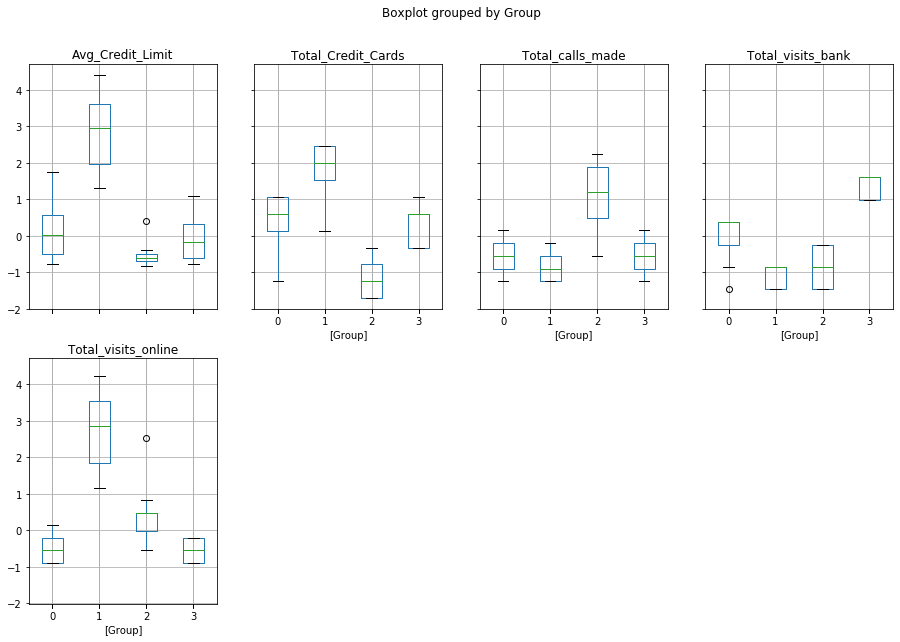

In [430]:
CCust_df_zscore.boxplot(by='Group',layout=(2,4),figsize=(15,10))

In [444]:
#Average silhouette score for KMeans clustering
silavg = silhouette_score(CCust_df_zscore,CCust_df_zscore['Group'])
print("The Average silhouette score is :",silavg)

The Average silhouette score is : 0.5929718389955255


In [431]:
CCust_df2 = CCust_df.drop(columns=['Group'],axis=1)
CCust_df_zscore2 = CCust_df_zscore.drop(columns=['Group'],axis=1)

In [452]:
#Using Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters = 3,affinity='euclidean',linkage='average') #Grouping into 3 clusters after manual comparison with 4clusters
model.fit(CCust_df_zscore2)
CCust_df_zscore2['Group'] = model.labels_
CCust_df2['Group'] = model.labels_
labels = model.labels_
CCust_df2.head()
counts = np.bincount(labels[labels>=0])# Counting the number of data in each clusters
print(counts)

[387  50 223]


In [450]:
CCust_df_cluster2 = CCust_df2.groupby(['Group'])
CCust_df_cluster2.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a47ed72d0>,
      dtype=object)

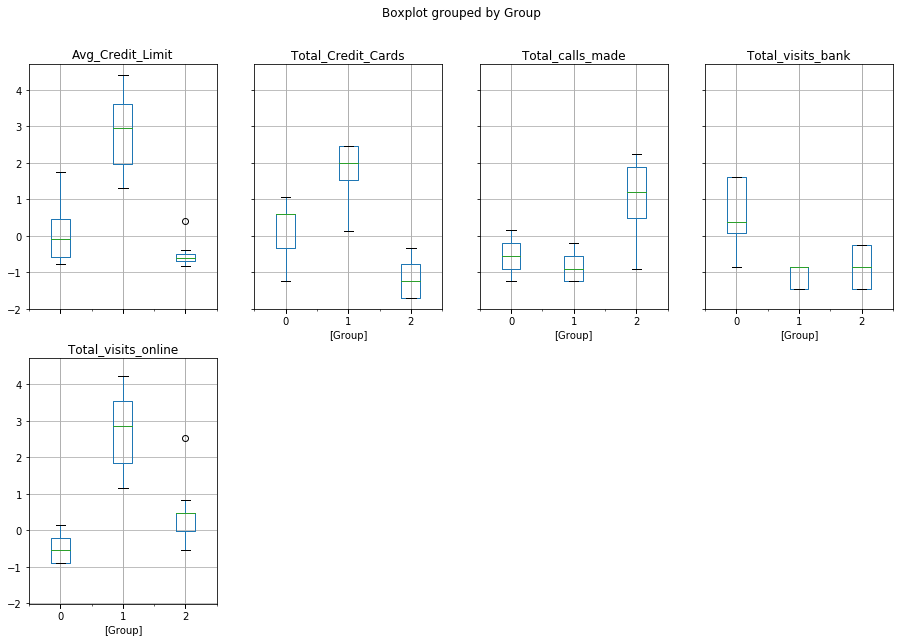

In [451]:
CCust_df_zscore2.boxplot(by='Group',layout=(2,4),figsize=(15,10))

#According to hierarchical Clustering:
#Cluster group 1 has the largest Average Credit Limit. Their total calls made was the smallest and visited online banking more
#Cluster group 2 has the lowest Average Credit Limit, higest total calls made to the bank, and Second highest total visits to the bank.
#Cluster group 0 has a moderate Average credit limit. They made the highest total visits to the bank.

0.9252387749820263


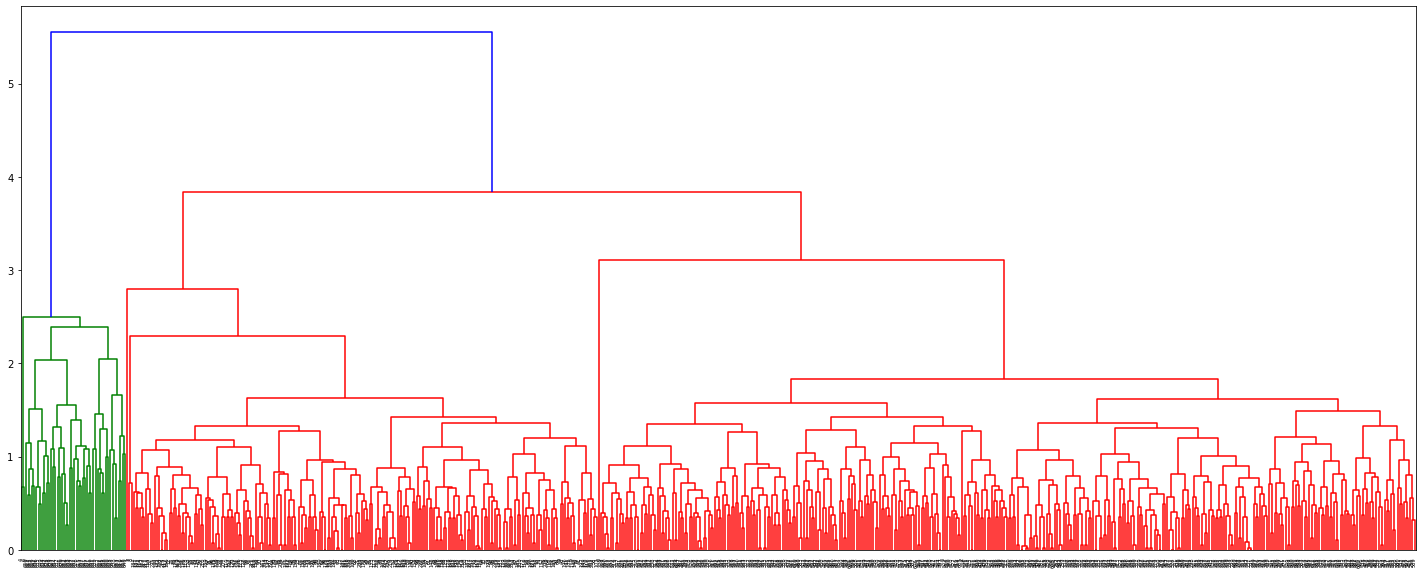

0.9181204166982053


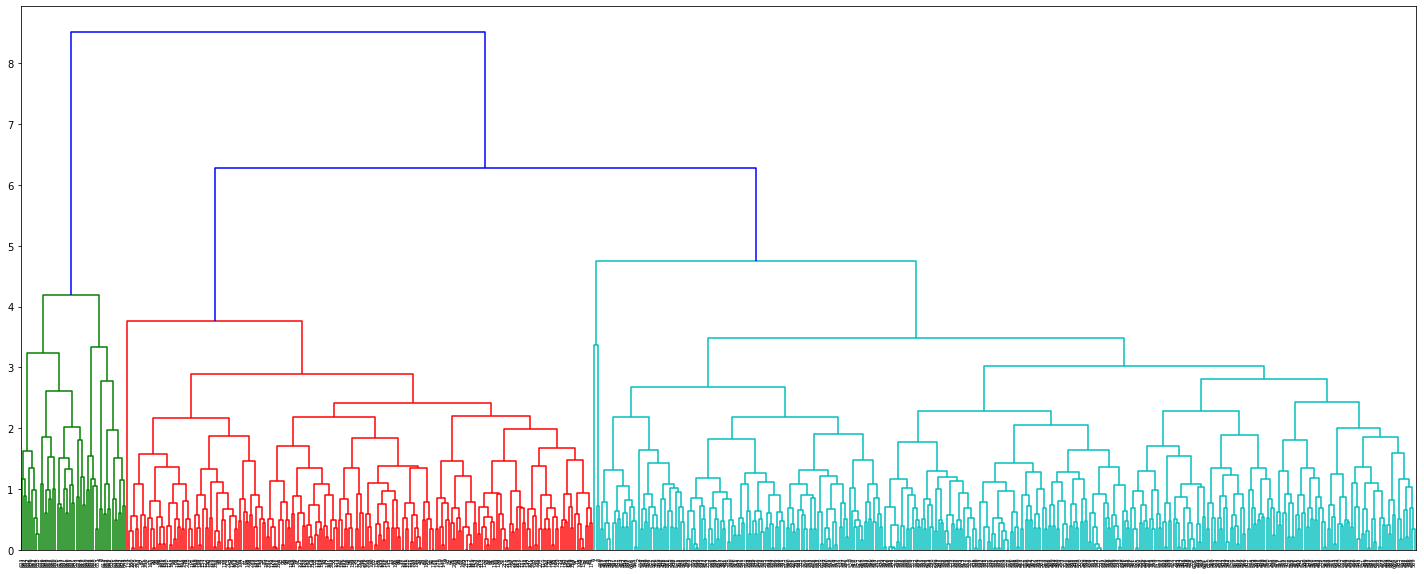

0.8464568634426607


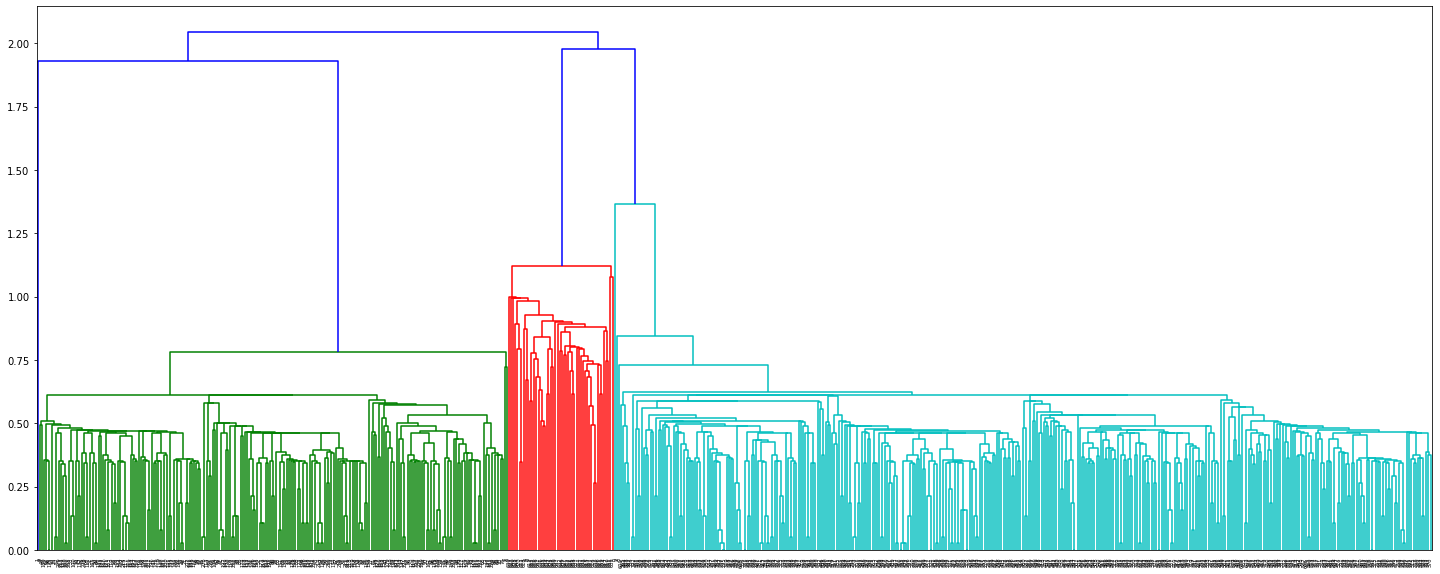

0.8170227112271451


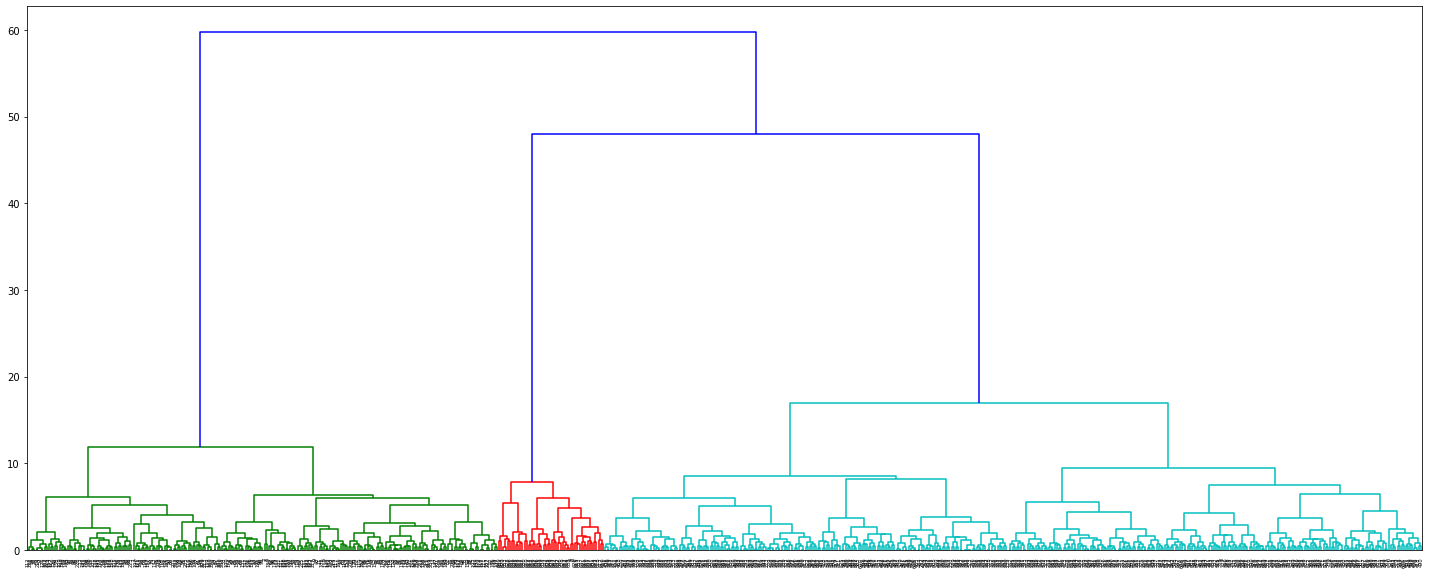

In [445]:
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from scipy.spatial.distance import pdist #pairwise distribution
linkg = ['average','complete','single','ward'] #using all linkage methods available
for i in linkg:
    Z = linkage(CCust_df_zscore2,method=i,metric='euclidean')
    c,coph_dists = cophenet(Z,pdist(CCust_df_zscore2))
    print(c) #Cophenetic coefficients of each linkage method
    #print(Z) #Linkage Matrix for each linkage method
    plt.figure(figsize=(25,10))
    dendrogram(Z)
    plt.show()

In [443]:
#Average silhouette score for hierarchical clustering
silavg = silhouette_score(CCust_df_zscore2,CCust_df_zscore2['Group'])
print("The Average silhouette score is :",silavg)

The Average silhouette score is : 0.590990473596407


Comparison of K-means clusters and Hierarchical clusters
#Average Silhouette Score: Kmeans clustering shows 0.5929 while Hierarchical clustering shows 0.5909
#Number of clusters: Kmeans clustering's elbow points favored 4 cluster groups while Hierarchical clustering favored 3 cluster groups
#Count of data: At 3 groups in each clustering method, Kmeans has 223 data in group 1, 247 data in group 2, 190 data in group 3. Hierarchical(Agglomerative) has  387 data in group 1, 50 data in group 2, 223 data in group 3.